In [ ]:
print "whatever"

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
# !pip install --upgrade pip
# !pip install statannot
#from statannot import add_stat_annotation

%matplotlib inline
os.chdir('/panicle/ssapkot/git_repo/GrainComp_GS/')

           PI17548   PI24969  PI329435  PI329440
PI17548   3.006460 -0.122688 -0.013999  0.056149
PI24969  -0.122688  2.379776 -0.089143  0.050402
PI329435 -0.013999 -0.089143  2.410878  0.040140
PI329440  0.056149  0.050402  0.040140  2.190077


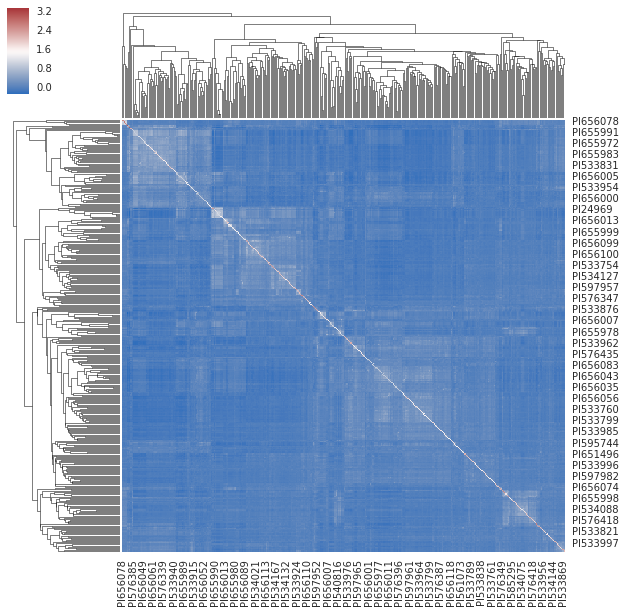

In [32]:
df = pd.read_csv('data/SAP_GRM.txt', sep=",",index_col=0)
print(df.iloc[1:5,1:5])
sns.clustermap(df, cmap='vlag')

### Summary results

In [19]:
df = pd.read_csv('results/PredAcc_total_Trait_Method_Pop.csv')
print(df.head())
#df2 = df[ (df.Trait =='Amylose') & (df.pop =='GSDP')]
#df2 = df[df.Trait =='Starch']
df2 = df[df.Env == '2013']
print(df2.head())

       Trt_Env    Trait   Env  iter         r method   pop
0  Amylose2013  Amylose  2013   123  0.150001   STSE  GSDP
1  Amylose2013  Amylose  2013   123  0.135053   STSE  GSDP
2  Amylose2013  Amylose  2013   123  0.321724   STSE  GSDP
3  Amylose2013  Amylose  2013   123  0.325483   STSE  GSDP
4  Amylose2013  Amylose  2013   123  0.177365   STSE  GSDP
       Trt_Env    Trait   Env  iter         r method   pop
0  Amylose2013  Amylose  2013   123  0.150001   STSE  GSDP
1  Amylose2013  Amylose  2013   123  0.135053   STSE  GSDP
2  Amylose2013  Amylose  2013   123  0.321724   STSE  GSDP
3  Amylose2013  Amylose  2013   123  0.325483   STSE  GSDP
4  Amylose2013  Amylose  2013   123  0.177365   STSE  GSDP


/software/anaconda/5.1.0/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


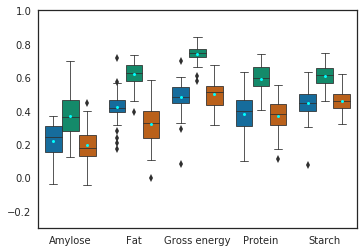

In [23]:
df2.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
df2.sort_values('Trait', inplace=True)

#pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style='white')

# Draw a boxplot for the environment and trait 
g = sns.boxplot(x="Trait",
                    y="r",
                    hue="method",
                palette="colorblind",
                linewidth=0.8,
                whis=1.5,
                #meanline=True,
                showmeans=True,
                meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df2
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
#g.set(xlabel='', yticklabels=[],ylabel='', ylim = (-0.5,1)) ##yticklabels is removed by []
g.set(xlabel='', ylabel='', ylim = (-0.3,1)) ##yticklabels is removed by []
#plt.legend(loc=0, ncol = 3)
box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position

# Put a legend to the right side
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),  ncol=1, borderaxespad=0.)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.legend_.remove()
plt.title(s='', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/Summary_Figs/GSDP_2014_summary.png", bbox_inches='tight', dpi=300)



## BMORS results

### GSDP 

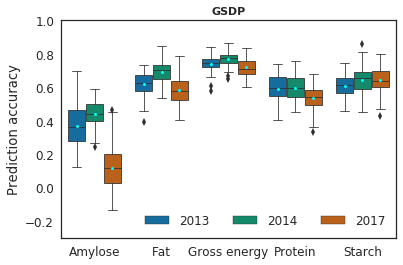

In [4]:
df = pd.read_csv('results/BMORS/SAP_BMORS_CV5.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
df.sort_values('Trait', inplace=True)

#pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style='white',font_scale=1.2)

# Draw a boxplot for the environment and trait 
g = sns.boxplot(x="Trait",
                    y="Pearson",
                    hue="Environment",
                palette="colorblind",
                linewidth=0.8,
                whis=1.5,
                #meanline=True,
                showmeans=True,
                meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Prediction accuracy', ylim = (-0.3,1))
plt.legend(loc='lower right', ncol = 3)
plt.title(s='GSDP', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BMORS/SAP_BMORS_CV5.png",dpi=500)


   Environment         Trait  Pearson  MAAPE
0         2013       Amylose   0.3899    NaN
1         2013           Fat   0.6235    NaN
2         2013  Gross energy   0.7645    NaN
3         2013       Protein   0.6045    NaN
4         2013        Starch   0.6279    NaN


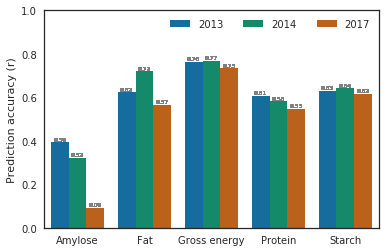

In [10]:
df = pd.read_csv('results/BMORS/SAP_BMORS_CV-Env.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
print(df.head())
df.sort_values('Trait', inplace=True)

# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')
total = float(len(df))
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.barplot(x="Trait",
                y="Pearson",
                hue="Environment",
                palette="colorblind",
                ci=None,
                #notch = False,
                data=df
                  )
# for index,data in enumerate(Pearson):
#     plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
    
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Prediction accuracy (r)', ylim = (0,1))
plt.legend(loc='upper right', ncol = 3)
plt.title(s='', fontsize=11, weight='bold')
ax = g #annotate axis = seaborn axis

def annotateBars(row, ax=ax): 
        for p in ax.patches:
          ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=6, color='gray', rotation=0, xytext=(0, 3),
                      textcoords='offset points')
            
plot = df.apply(annotateBars, ax=ax, axis=1)

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BMORS/SAP_BMORS_CV-Env.png",dpi=500)

### BTx642

   iter Environment    Trait  Partition  Pearson   MAAPE
0   123      SC2014  Amylose          1   0.6543  0.6416
1   123      SC2014  Amylose          2   0.8546  0.6031
2   123      SC2014  Amylose          3   0.9042  0.5401
3   123      SC2014  Amylose          4   0.8312  0.5000
4   123      SC2014  Amylose          5   0.8084  0.4472
              iter    Partition      Pearson        MAAPE
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    127.500000     3.000000     0.655733     0.675188
std       2.873719     1.414921     0.126796     0.099148
min     123.000000     1.000000    -0.135500     0.345700
25%     125.000000     2.000000     0.575900     0.609850
50%     127.500000     3.000000     0.666950     0.676450
75%     130.000000     4.000000     0.746475     0.743125
max     132.000000     5.000000     0.946500     0.993000


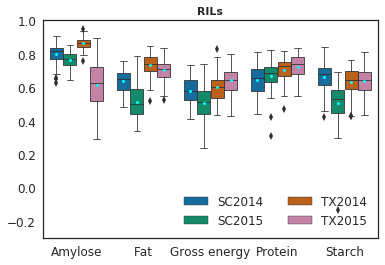

In [3]:
df = pd.read_csv('results/BMORS/BTx642_BMORS_CV5.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'GrossEnergy':'Gross energy'}, regex=True)
print(df.head())
print(df.describe())

# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white',font_scale=1.2)

# Draw a boxplot for the environment and trait 
g = sns.boxplot(x="Trait",
                    y="Pearson",
                    hue="Environment",
                palette="colorblind",
                linewidth=0.8,
                whis=1.5,
                showmeans=True,
                meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='', ylim = (-0.3,1))
plt.legend(loc='lower right', ncol = 2)
plt.title(s='RILs', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BMORS/BTx642_BMORS_CV5.png",dpi=500)


  Environment         Trait  Pearson   MAAPE
0      SC2014       Amylose   0.7299  0.5269
1      SC2014           Fat   0.7130  0.6656
2      SC2014  Gross energy   0.6481  0.7477
3      SC2014       Protein   0.6054  0.7081
4      SC2014        Starch   0.6713  0.6946


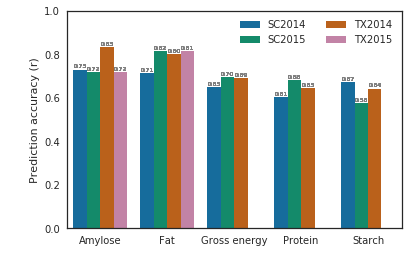

In [19]:
df = pd.read_csv('results/BMORS/BTx642_BMORS_CV-ENV.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
print(df.head())

# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')
total = float(len(df))
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.barplot(x="Trait",
                  y="Pearson",
                  hue="Environment",
                palette="colorblind",
                ci=None,
                  #notch = False,
                  data=df
                  )
# for index,data in enumerate(Pearson):
#     plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
    
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Prediction accuracy (r)', ylim = (0,1))
plt.legend(loc='upper right', ncol = 2)
plt.title(s='', fontsize=11, weight='bold')
ax = g #annotate axis = seaborn axis

def annotateBars(row, ax=ax): 
        for p in ax.patches:
          ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=6, color='gray', rotation=0, xytext=(0, 3),
                      textcoords='offset points')
            
plot = df.apply(annotateBars, ax=ax, axis=1)

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BMORS/BTx642_BMORS_CV-Env.png",dpi=500)

   Environment         Trait  Pearson   MAAPE
0         2014       Amylose   0.5389  0.5912
1         2014           Fat   0.6334  0.6772
2         2014  Gross energy   0.6093  0.7341
3         2014       Protein   0.4996  0.8308
4         2014        Starch   0.3030  0.7839


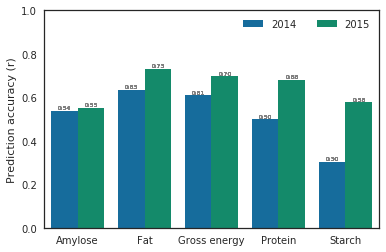

In [9]:
### Predict one year to another BMORS_Env
df = pd.read_csv('results/BMORS/BTx642_BMORS_CV-Year.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
print(df.head())

# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')
total = float(len(df))
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.barplot(x="Trait",
                  y="Pearson",
                  hue="Environment",
                palette="colorblind",
                ci=None,
                  #notch = False,
                  data=df
                  )
# for index,data in enumerate(Pearson):
#     plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
    
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Prediction accuracy (r)', ylim = (0,1))
plt.legend(loc='upper right', ncol = 2)
plt.title(s='', fontsize=11, weight='bold')
ax = g #annotate axis = seaborn axis

def annotateBars(row, ax=ax): 
        for p in ax.patches:
          ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=6, color='gray', rotation=0, xytext=(0, 3),
                      textcoords='offset points')
            
plot = df.apply(annotateBars, ax=ax, axis=1)

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BMORS/BTx642_BMORS_CV-Year.png",dpi=500)


  Environment         Trait  Pearson  MAAPE
0          SC       Amylose   0.7596    NaN
1          SC           Fat   0.7434    NaN
2          SC  Gross energy   0.6073    NaN
3          SC       Protein   0.4458    NaN
4          SC        Starch   0.4216    NaN


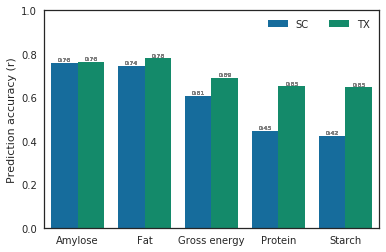

In [10]:
### Predicting location BMORS_Env
df = pd.read_csv('results/BMORS/BTx642_BMORS_CV-Loc.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
print(df.head())

# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')
total = float(len(df))
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.barplot(x="Trait",
                  y="Pearson",
                  hue="Environment",
                palette="colorblind",
                ci=None,
                  #notch = False,
                  data=df
                  )
# for index,data in enumerate(Pearson):
#     plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
    
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Prediction accuracy (r)', ylim = (0,1))
plt.legend(loc='upper right', ncol = 2)
plt.title(s='', fontsize=11, weight='bold')
ax = g #annotate axis = seaborn axis

def annotateBars(row, ax=ax): 
        for p in ax.patches:
          ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=6, color='gray', rotation=0, xytext=(0, 3),
                      textcoords='offset points')
            
plot = df.apply(annotateBars, ax=ax, axis=1)

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BMORS/BTx642_BMORS_CV-Loc.png",dpi=500)

## Single Trait Single Environment (STSE) results

### BTx642

  Method          Trt_Env    Trait     Env  iter         r
0   STSE  Amylose_2014_SC  Amylose  SC2014   123  0.701608
1   STSE  Amylose_2014_SC  Amylose  SC2014   123  0.619113
2   STSE  Amylose_2014_SC  Amylose  SC2014   123  0.677788
3   STSE  Amylose_2014_SC  Amylose  SC2014   123  0.592283
4   STSE  Amylose_2014_SC  Amylose  SC2014   123  0.638882
              iter            r
count  1000.000000  1000.000000
mean    127.500000     0.503968
std       2.873719     0.136300
min     123.000000     0.008675
25%     125.000000     0.419517
50%     127.500000     0.513531
75%     130.000000     0.597435
max     132.000000     0.904206


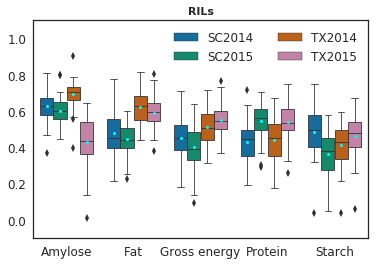

In [31]:
df = pd.read_csv('results/STSE/BTx642_STSE_CV5.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'GrossEnergy':'Gross energy'}, regex=True)
print(df.head())
print(df.describe())
df.sort_values(by=['Trait','Env'], inplace=True)
#df.sort_values(by=['Env'], inplace=True)
# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white', font_scale = 1.2)
# Draw a boxplot for the environment and trait 
g = sns.boxplot(x="Trait",
                    y="r",
                    hue="Env",
                palette="colorblind",
                linewidth=0.8,
                whis=1.5,
                showmeans=True,
                meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df
                  )
#sns.despine(left=True,bottom=True)
#g.set_xticklabels(ha='right',rotation=30)
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='', ylim = (-0.1,1.1))
plt.legend(loc='upper right', ncol = 2)
plt.title(s='RILs', fontsize=11, weight='bold')


plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/STSE/BTx642_STSE_CV5.png",dpi=500)

In [4]:
### catplot

# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')

# Draw a boxplot for the environment and trait 
g = sns.catplot(x="Trait",
                    y="r",
                    hue="Env",
                    dodge=True,
#                    col="Env",
#                     showmeans=True,
#                     meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df
                  )

#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='', ylim = (0.1,1))
plt.legend(loc='upper right', ncol = 2)
plt.title(s='', fontsize=11, weight='bold')

AttributeError: 'module' object has no attribute 'catplot'

               Env        iter           r
count   750.000000  750.000000  750.000000
mean   2014.666667  127.500000    0.405882
std       1.700807    2.874198    0.141517
min    2013.000000  123.000000   -0.055250
25%    2013.000000  125.000000    0.325824
50%    2014.000000  127.500000    0.422301
75%    2017.000000  130.000000    0.502460
max    2017.000000  132.000000    0.728772


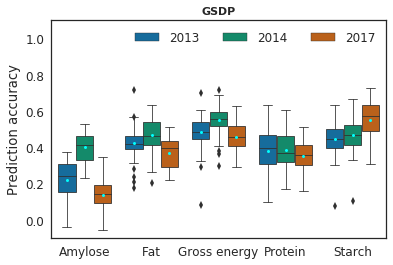

In [29]:
df = pd.read_csv('results/STSE/SAP_CV5_STSE_DryBasis.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
#print(df.iloc[155:175,:])
print(df.describe())
df.sort_values(by='Trait', inplace=True)
#print(df.iloc[155:175,:])

# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white',font_scale = 1.2)

# Draw a boxplot for the environment and trait 
g = sns.boxplot(x="Trait",
                    y="r",
                    hue="Env",
                palette="colorblind",
                linewidth=0.8,
                whis=1.5,
                showmeans=True,
                meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Prediction accuracy', ylim = (-0.1,1.1))
#plt.yticks(ticks=None)
plt.legend(loc='upper right', ncol = 3)
plt.title(s='GSDP', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/STSE/SAP_CV5_STSE_db.png",dpi=500)

## Multi Environment (BME)

### SAP

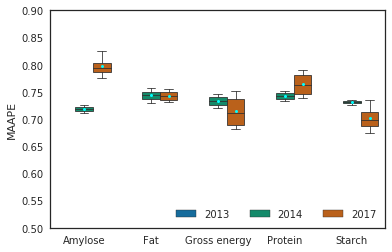

In [39]:
df = pd.read_csv('results/BME/SAP_BME_CV5_complete.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
df.sort_values('Trait', inplace=True)

# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')

# Draw a boxplot for the environment and trait 
g = sns.boxplot(x="Trait",
                    y="MAAPE",
                    hue="Env",
                palette="colorblind",
                linewidth=0.8,
                whis=1.5,
                showmeans=True,
                meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='MAAPE', ylim = (0.5,0.9))
plt.legend(loc='lower right', ncol = 3)
plt.title(s='', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BME/SAP_BME_CV5_MAAPE.png",dpi=500)

  Method    Trait  Seed          Trt_Env     Env  Pearson   MAAPE
0    BME  Amylose   123  Amylose_2014_SC  SC2014   0.5093  0.6472
1    BME  Amylose   123  Amylose_2014_SC  SC2014   0.7280  0.6400
2    BME  Amylose   123  Amylose_2014_SC  SC2014   0.5294  0.6812
3    BME  Amylose   123  Amylose_2014_SC  SC2014   0.6406  0.6424
4    BME  Amylose   123  Amylose_2014_SC  SC2014   0.7210  0.5947


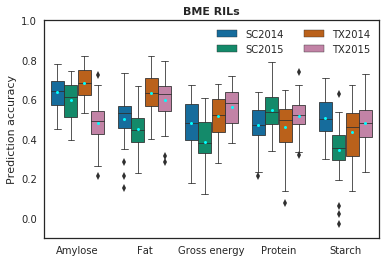

In [9]:
df = pd.read_csv('results/BME/BTx642_BME_CV5_complete.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'GrossEnergy':'Gross energy'}, regex=True)
print(df.head())
# print(df.describe())
# is_df = df['Pop']=='BTx642'
# sap = df[is_df]
# print(sap.head())
df.sort_values(by=['Trait','Env'], inplace=True)
# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')

# Draw a boxplot for the environment and trait 
g = sns.boxplot(x="Trait",
                    y="Pearson",
                    hue="Env",
                palette="colorblind",
                linewidth=0.8,
                whis=1.5,
                showmeans=True,
                meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Prediction accuracy', ylim = (-0.1,1))
plt.legend(loc='upper right', ncol = 2)
plt.title(s='BME RILs', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BME/BTx642_BME_CV5.png",dpi=500)

## Multi Trait (BMT)
#### BTX642

  Method  Seed          Trt_Env    Trait     Env  Pearson   MAAPE
0    BMT   123  Amylose_2014_SC  Amylose  SC2014   0.4488  0.6801
1    BMT   123  Amylose_2014_SC  Amylose  SC2014   0.6976  0.6417
2    BMT   123  Amylose_2014_SC  Amylose  SC2014   0.5112  0.6807
3    BMT   123  Amylose_2014_SC  Amylose  SC2014   0.6182  0.6558
4    BMT   123  Amylose_2014_SC  Amylose  SC2014   0.7097  0.6506


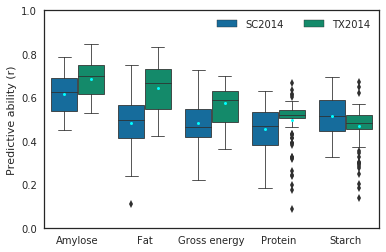

In [29]:
df = pd.read_csv('results/BMT/BTx642_BMT_CV5_complete.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'GrossEnergy':'Gross energy'}, regex=True)
print(df.head())
# print(df.describe())
# is_df = df['Pop']=='BTx642'
# sap = df[is_df]
# print(sap.head())
#df.sort_values(by=['Trait','ENV'], inplace=True)
# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')

# Draw a boxplot for the environment and trait 
g = sns.boxplot(x="Trait",
                    y="Pearson",
                    hue="Env",
                palette="colorblind",
                linewidth=0.8,
                whis=1.5,
                showmeans=True,
                meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Predictive ability (r)', ylim = (0,1))
plt.legend(loc='upper right', ncol = 2)
plt.title(s='', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BMT/BTx642_BMT_CV5.png",dpi=500)

#### SAP

  Method   Env  Seed      Trt_Env    Trait  Pearson  MAAPE
0    BMT  2013   123  Amylose2013  Amylose   0.0892    NaN
1    BMT  2013   123  Amylose2013  Amylose   0.0761    NaN
2    BMT  2013   123  Amylose2013  Amylose   0.1377    NaN
3    BMT  2013   123  Amylose2013  Amylose   0.3577    NaN
4    BMT  2013   123  Amylose2013  Amylose   0.2187    NaN


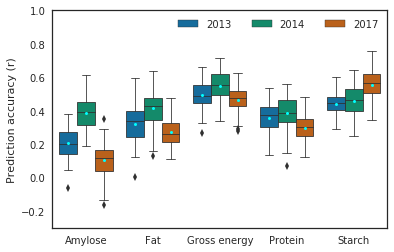

In [28]:
df = pd.read_csv('results/BMT/SAP_BMT_CV5_complete.csv')

#del df['Unnamed: 0']
df.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
print(df.head())
# print(df.describe())
# is_df = df['Pop']=='BTx642'
# sap = df[is_df]
# print(sap.head())
#df.sort_values(by=['Trait','ENV'], inplace=True)
# pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')

# Draw a boxplot for the environment and trait 
g = sns.boxplot(x="Trait",
                    y="Pearson",
                    hue="Env",
                palette="colorblind",
                linewidth=0.8,
                whis=1.5,
                showmeans=True,
                meanprops={"marker":".","markerfacecolor":"cyan", "markeredgecolor":"blue"},
                    data = df
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Prediction accuracy (r)', ylim = (-0.3,1))
plt.legend(loc='upper right', ncol = 3)
plt.title(s='', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/BMT/SAP_BMT_CV5.png",dpi=500)

In [88]:
### Correlation plots for GSDP
df = pd.read_csv("data/pheno.csv")
df2 = df.iloc[:,[0,1,2,3,6,7]]
df2.rename(columns={'Cal.g':'Gross_Energy'}, inplace=True)
df2.describe()
corr = df2.corr()
print(corr)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
#     ax = sns.heatmap(corr, 
#                      mask=mask, 
#                      square=True,
#                      cmap=cmap,
#                      vmin=-1, 
#                      vmax=1, 
#                      xticklabels=['Amylose', 'Gross Energy', 'Fat', 'Protein', ''], 
#                      yticklabels=['', 'Gross Energy', 'Fat', 'Protein', 'Starch'],
#                      cbar_kws= {"shrink": .5}
#                     ) 
# Function to calculate correlation coefficient between two arrays
    def corr(x, y, **kwargs):
    
    # Calculate the value
        coef = np.corrcoef(x, y)[0][1]
    # Make the label
        label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
        ax = plt.gca()
        ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= df2, size = 2)
# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'purple')
grid = grid.map_upper(corr)
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkorange', 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
#             plt.xticks(rotation=40)
#             plt.yticks(rotation=0)
#             plt.tight_layout()
#             plt.text(x=2, y=1, s='GSDP', fontsize=11, weight='bold')

#df2.describe()
#plt.savefig("../git_repo/GrainComp_GS/results/figures/Correlation_heatmap_GSDP.png",  dpi=500)

IOError: File data/pheno.csv does not exist

In [ ]:
#### correlation plot for RILs- BTx642
df = pd.read_csv("data/BTx_GrainComp_blups.csv")
print(df.describe())
df2 = df.iloc[:,[0,2,3,4,5,6]]

corr = df2.corr()
print(corr)
mask = np.zeros_like(corr)
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,
                     #cmap=cmap,
                     mask=mask, 
                     square=True, 
                     vmin=-1, 
                     vmax=1, 
                     xticklabels=['Amylose', 'Fat', 'Starch','Protein', ''], 
                     yticklabels=['', 'Fat', 'Starch', 'Protein', 'Gross Energy'],
                     cbar = False
                    ) 
    plt.xticks(rotation=40)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.text(x=2, y=1, s='RILs', fontsize=11, weight='bold')
    
#df2.describe()
plt.savefig("../git_repo/GrainComp_GS/results/figures/Correlation_heatmap_BTx642.png", dpi=300)

In [89]:
#### correlation plot for RILs- P85
df = pd.read_csv("data/pheno.csv")
df.rename(columns={'Cal.g':'Gross Energy'}, inplace=True)
print(df.head())
df2 = df.iloc[:,[0,1,3,7,6,2]]

corr = df2.corr()
print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, 
                     mask=mask, 
                     square=True, 
                     vmin=-1, 
                     vmax=1, 
                     xticklabels=['Amylose', 'Fat', 'Starch','Protein', ''], 
                     yticklabels=['', 'Fat', 'Starch', 'Protein', 'Gross Energy'],
                     cbar_kws= {"shrink": .5}
                     #cbar = False
                    ) 
    plt.xticks(rotation=30)
    plt.yticks(rotation=0)
    plt.text(x=3, y=0.8, s='GSDP', fontsize=11, weight='bold')
    plt.tight_layout()
    plt.savefig("../git_repo/GrainComp_GS/results/figures/Correlation_heatmap_GSDP.png",dpi=300)

IOError: File data/pheno.csv does not exist

              Year       Starch      Protein          Fat      Amylose  \
count  1195.000000  1078.000000  1078.000000  1078.000000  1078.000000   
mean   2014.621757    68.302543    12.018357     2.528722    13.873599   
std       1.685248     2.439617     1.448996     0.572912     2.985740   
min    2013.000000    55.750000     7.160000     0.980000    -6.855000   
25%    2013.000000    66.981250    11.081250     2.175000    12.055000   
50%    2014.000000    68.505000    12.010000     2.505000    13.942500   
75%    2017.000000    69.948750    12.915000     2.838750    15.946250   
max    2017.000000    75.450000    17.475000     6.695000    21.600000   

              IVSD  Gross_Energy  
count  1078.000000   1078.000000  
mean     47.335165   4108.328483  
std       3.276888     55.155378  
min      39.580000   3924.990000  
25%      44.921250   4073.500000  
50%      47.450000   4105.267500  
75%      49.797500   4140.137500  
max      56.050000   4436.350000  
                  

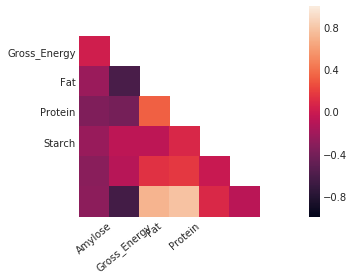

In [2]:
### Correlation plots for GSDP
df = pd.read_csv("data/GrainQuality_YearMeans.csv")
#df2 = df.iloc[:,[0,1,2,3,6,7]]
df.rename(columns={'Cal.g':'Gross_Energy'}, inplace=True)
print(df.describe())
corr = df.corr()
print(corr)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, 
                     mask=mask, 
                     square=True, 
                     vmin=-1, 
                     vmax=1, 
                     xticklabels=['Amylose', 'Gross_Energy', 'Fat', 'Protein', ''], 
                     yticklabels=['', 'Gross_Energy', 'Fat', 'Protein', 'Starch']
                     #cbar_kws={"shrink": .5}
                    ) 
    plt.xticks(rotation=40)
    plt.yticks(rotation=0)
    plt.tight_layout()
#df2.describe()
#plt.savefig("../git_repo/GrainComp_GS/results/Correlation_heatmap_GSDP_Years.png")

In [36]:
# df = pd.read_csv("data/BTx642_GrainComp_YearLocation.csv")

# d = {'Fat*': 'Fat', 'GE*': 'Gross Energy', 'Prt*': 'Protein', 'Sta*': 'Starch', 'Ams*': 'Amylose'} ## using wildcard to change column names
# df.columns = df.columns.to_series().replace(d, regex=True)
# df.columns = df.columns.str.replace("SC", "")
# df.columns = df.columns.str.replace("14", "")
# df.columns = df.columns.str.replace("TX", "")
# df.columns = df.columns.str.replace("15", "")##replace all strings after the trait names

# print(df.dtypes)

    Ams14SC   Ams14TX   Ams15SC   Ams15TX   Fat14SC   Fat14TX   Fat15SC  \
0  1.936451  0.643874  1.627452  1.750836  0.038189  0.548197  0.197516   
1  1.817563 -1.146344 -3.630765 -0.647210 -0.442827  0.063130  0.028580   
2  0.598961  1.463206  4.880795  0.208768  0.207096  0.033081  0.160561   
3  1.040545 -0.933223  2.083963  0.499540  0.159362  0.406540  0.103898   
4 -0.144089 -0.407524 -6.270040 -1.816829  0.574285  0.509563  0.266146   

    Fat15TX     GE14SC     GE14TX   ...      GE15TX   Prt14SC   Prt14TX  \
0  0.461329   4.095399  -2.634996   ...    8.106796  0.021242 -1.587343   
1 -0.112014  -5.553580   4.964093   ...    7.730298 -0.811481 -0.713780   
2 -0.404027   4.244257  29.457148   ...   -6.200112 -0.432970  1.345946   
3  0.005504  13.003065  12.822626   ...    2.356651 -0.353063 -0.666676   
4  0.568163  -3.758352   0.068490   ...   -1.408325 -0.836715 -1.163408   

    Prt15SC   Prt15TX   Sta14SC   Sta14TX   Sta15SC   Sta15TX    Taxa  
0 -0.257445 -0.399712  0.4

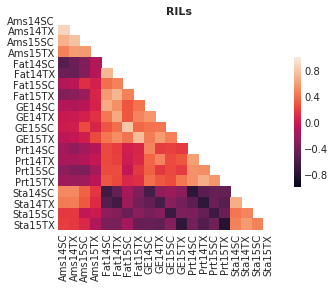

In [5]:
df = pd.read_csv("data/BTx642_GrainComp_YearLocation.csv")

df = df.reindex(sorted(df.columns), axis=1)
print(df.head())
#print(df.describe())
corr = df.corr()
corrdf  = pd.DataFrame(corr)
print(corr)

cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#corrdf.to_csv ('Correlations_P85_GrainComp_YearLocation.csv', index = False, header=True)
with sns.axes_style("white"):
    ax = sns.heatmap(corr, 
                     mask=mask, 
                     square=True, 
                     vmin=-1, 
                     vmax=1,
                     #xticklabels=['Amylose', 'G_Energy', 'Fat', 'Protein', ''], 
                     #yticklabels=['', 'G_Energy', 'Fat', 'Protein', 'Starch']
                     cbar_kws={"shrink": .6}
                    ) 
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.text(x=10, y=0, s='RILs', fontsize=11, weight='bold')
plt.savefig("results/figures/BTx642_Correlation_heatmap_YearLocation.png", dpi=500)

      Ams13     Ams14     Ams17     Fat13     Fat14     Fat17       GE13  \
0 -1.306041 -0.151870  0.699486 -0.039423 -0.287415  0.297318 -37.771799   
1  0.669386  0.969752  1.182138  1.163860  0.594925  0.283269  79.014216   
2 -1.245259 -1.765633 -0.990737 -0.502849 -0.168638  0.014988 -66.968303   
3 -0.789391 -1.624476  0.295582 -0.433742  0.128303  0.140468  -4.235275   
4  0.699777 -0.243431  0.465376 -0.039423 -0.015926  0.042437 -13.704411   

        GE14       GE17     Prt13     Prt14     Prt17     Sta13     Sta14  \
0 -74.202742   0.003384 -1.211168 -2.409287  0.939387  2.766715  5.018051   
1  45.823305  72.282107 -0.207198 -0.869503  0.255628 -1.923487 -1.801738   
2 -46.292755 -44.688056 -1.242873 -0.970411 -0.200635  2.639091  2.594858   
3  18.874226   2.116721  1.962787  1.141187  0.146087 -1.381083 -2.462240   
4 -15.281658  26.425938 -0.570036 -0.350012  0.420691  1.043784  1.585870   

      Sta17      Taxa  
0 -2.674919  PI152651  
1 -2.883531   PI17548  
2  1.497

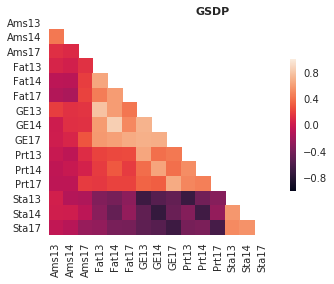

In [18]:
df = pd.read_csv('data/SAP_GrainComp_Year.csv')
#df = df[['Taxa','Ams13','Ams14','Ams17','Fat13','Fat14','Fat17','GE13','GE14','GE17','Prt13','Prt14','Prt17','Sta13','Sta14','Sta17']]
df = df.reindex(sorted(df.columns), axis=1)
print(df.head())
print(df.describe())
corr = df.corr()
corrdf  = pd.DataFrame(corr)
print(corr)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
corrdf.to_csv ('Correlations_SAP_GrainComp_Year.csv', index = False, header=True)
with sns.axes_style("white"):
    ax = sns.heatmap(corr, 
                     mask=mask, 
                     square=True, 
                     vmin=-1, 
                     vmax=1, 
#                      xticklabels=['Amylose', 'Gross_Energy', 'Fat', 'Protein', ''], 
#                      yticklabels=['', 'Gross_Energy', 'Fat', 'Protein', 'Starch']
                     cbar_kws={"shrink": .6}
                    ) 
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.text(x=10, y=0, s='GSDP', fontsize=11, weight='bold')
    plt.savefig("results/figures/SAP_Correlation_heatmap_Year.png", dpi=500)

In [34]:
### box plot phenotypic data
df = pd.read_csv('data/BTx_Yield_Quality_Phenotypes.csv')
print(df.head())
# df <- df[['Pedigree2','Year','Location','Rep','Amylose','Cal.g','Fat','Protein','Starch']]
# #colnames(pheno) <- c('Taxa','Year','Location','Rep','Amylose','Gross_Energy','Fat','Protein','Starch')

# print(df.head())

  Pedigree2  Year Location  Rep  Anthesis  Height     GNP   TGW   YPP  \
0    BTx642  2014       SC    1      76.0     NaN  1264.0  32.0  40.5   
1  BTxARG-1  2014       SC    1      78.0     NaN  2762.0  23.2  64.6   
2    CS_001  2014       SC    1      70.0     NaN  2818.0  15.9  45.6   
3    CS_002  2014       SC    1      77.0     NaN  2764.0  27.5  75.8   
4    CS_004  2014       SC    1      76.0     NaN  2563.0  24.7  63.4   

   Amylose    Cal.g   Fat  Protein  Starch  
0    14.25  4171.34  3.72    11.53   67.77  
1     2.87  4109.92  3.42    11.85   66.54  
2    13.14  4119.23  2.96    11.84   70.06  
3    12.63  4077.12  2.65    10.62   71.24  
4    10.54  4151.21  3.39    11.32   69.19  


    Pop    Trait Model   Seed         r
0  RILs  Amylose   BRR  12345  0.497859
1  RILs  Amylose   BRR  12346  0.580269
2  RILs  Amylose   BRR  12347  0.666813
3  RILs  Amylose   BRR  12348  0.586812
4  RILs  Amylose   BRR  12349  0.610330
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Fat_RILs v.s. Fat_GSDP: Mann-Whitney-Wilcoxon test two-sided P_val=1.094e-10 U_stat=8.870e+02
Amylose_RILs v.s. Amylose_GSDP: Mann-Whitney-Wilcoxon test two-sided P_val=3.020e-11 U_stat=9.000e+02
Starch_RILs v.s. Starch_GSDP: Mann-Whitney-Wilcoxon test two-sided P_val=6.518e-09 U_stat=5.700e+01
Protein_RILs v.s. Protein_GSDP: Mann-Whitney-Wilcoxon test two-sided P_val=2.531e-04 U_stat=6.980e+02
Gross energy_RILs v.s. Gross energy_GSDP: Mann-Whitney-Wilcoxon test two-sided P_val=6.353e-02 U_stat=5.760e+02


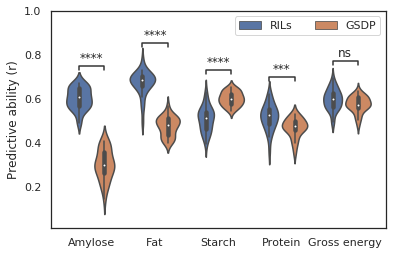

In [3]:
### For BRR between the two populations
df = pd.read_csv('results/Predictability_BRR_bothPopulation_IndivAccuracy.csv')
# df = df[['variable','TPsize','value']]
# df = df.iloc[1:,:]

df.Trait = df.Trait.replace({'Gross_Energy':'Gross energy'}, regex=True)
print(df.head())
# del df['Unnamed: 0']
# del df['id']
# df_m = pd.melt(df, id_vars=['trait'], value_vars=['1000','5000','10000','20000','100000','224007'])
p = 5
#df['TPsize'].round().astype(int)
#print(df.head())
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.violinplot(x="Trait",
                    y="r",
                    hue="Pop",
                    notch = False,
                    scale_hue=True,
                    data = df,
                    linewidth=1.5,
                    inner = "box"
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Predictive ability (r)', ylim = (0.01,1))
add_stat_annotation(g, data=df, x="Trait", y="r", hue="Pop",
                    box_pairs=[(("Amylose", "RILs"), ("Amylose", "GSDP")),
                                 (("Fat", "RILs"), ("Fat", "GSDP")),
                                 (("Starch", "RILs"), ("Starch", "GSDP")),
                                 (("Protein", "RILs"), ("Protein", "GSDP")),
                                 (("Gross energy", "RILs"), ("Gross energy", "GSDP"))
                                ],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
plt.legend(loc='upper right', ncol=2) #bbox_to_anchor=(1.25, 1))
#plt.title(s='', fontsize=11, weight='bold')

#plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/figures/r_BRR_betwn_Pop.png",dpi=500)




   Unnamed: 0   Model      variable     value
0           1  BayesA  Gross Energy  0.605628
1           2  BayesA  Gross Energy  0.558189
2           3  BayesA  Gross Energy  0.566230
3           4  BayesA  Gross Energy  0.615508
4           5  BayesA  Gross Energy  0.622943


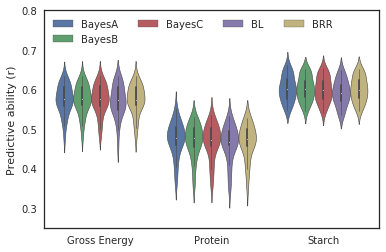

In [28]:
df = pd.read_csv('results/Predictability_SAP_IndivFolds_accuracy_SPG.csv')
# df = df[['variable','TPsize','value']]
# df = df.iloc[1:,:]

df.variable = df.variable.replace({'Cal.g':'Gross Energy'}, regex=True)
print(df.head())
# del df['Unnamed: 0']
# del df['id']
# df_m = pd.melt(df, id_vars=['trait'], value_vars=['1000','5000','10000','20000','100000','224007'])
p = 5
#df['TPsize'].round().astype(int)
#print(df.head())
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.set(style='white')

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.violinplot(x="variable",
                    y="value",
                    hue="Model",
                    notch = False,
                    scale_hue=True,
                    data = df,
                    linewidth=0.6,
                    inner = "box"
                  )
#sns.swarmplot(x="Trait", y="r", hue ="Model", data=df, size=2, color=".3", linewidth=0)
g.set(xlabel='', ylabel='Predictive ability (r)', ylim = (0.25,0.8))
plt.legend(loc='upper left', ncol = 4)
plt.title(s='', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/figures/r_SAP-SPG_Models.png",dpi=500)



     Trait  TPsize   Seed         r
0  Amylose      24  12345 -0.362092
1  Amylose      24  12346 -0.390199
2  Amylose      24  12347 -0.251341
3  Amylose      24  12348  0.172308
4  Amylose      24  12349  0.215156
           TPsize          Seed           r
count  750.000000    750.000000  750.000000
mean   129.600000  12359.500000    0.356075
std     97.966507      8.661218    0.267086
min     24.000000  12345.000000   -0.744702
25%     48.000000  12352.000000    0.223186
50%     96.000000  12359.500000    0.406214
75%    192.000000  12367.000000    0.535868
max    288.000000  12374.000000    0.953085


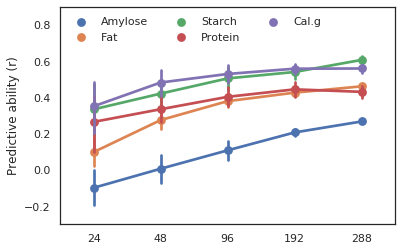

In [16]:
## TP size effect on predictive ability in BTx642
df = pd.read_csv('results/Predictability_SAP_TPsize_accuracy.csv')
# df = df[['variable','TPsize','value']]
# df = df.iloc[1:,:]
print(df.head())
#df.Trait = df.Trait.replace({'Cal.g':'Gross Energy'}, regex=True)
print(df.describe())
# del df['Unnamed: 0']
# del df['id']
# df_m = pd.melt(df, id_vars=['trait'], value_vars=['1000','5000','10000','20000','100000','224007'])

#df['TPsize'].round().astype(int)
#print(df.head())

sns.set(style='white')

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.pointplot(x="TPsize",
                  y="r",
                  hue="Trait",
                  notch = False,
                  data=df
                  )
g.set(xlabel='', ylabel='Predictive ability (r)', ylim = (-0.3,0.9))
plt.legend(frameon = False, loc='upper left', ncol = 3)
#plt.title(s='', fontsize=11, weight='bold')

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/figures/r_SAP_TPsize_noTitle.png",dpi=500)



In [2]:
### Marker based genomic heritability calculation
df =  pd.read_table('data/GenomicHeritability_all_R.txt')
print(df.head())
# sns.set(style="white")

# def errplot(x, y, yerr, **kwargs):
#     ax = plt.gca()
#     data = kwargs.pop("data")
#     data.plot(x=x, y=y, yerr=yerr, kind="bar", ax=ax, **kwargs)
# #Draw a pointplot to show pulse as a function of three categorical factors
# g = sns.barplot(x="Trait", 
#                 y="h2",
#                 hue="Population",
#                 palette="muted",
#                 data=df
#                )
# g.set(ylim=(0, 1))
# # g.errorbar(yerr='SE', data=df)
# g.map_dataframe(errplot, "Trait", "h2", "SE")
# #g.despine(left=True)
# g.set(xlabel='', ylabel='heritability')
# plt.legend(loc='upper right', ncol = 3)
# #plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/figures/GenomicHeritability_GrainComp.png",dpi=100)

  Population         Trait           va           ve        h2  lower_CI  \
0        SAP       Amylose     2.052028     6.596548  0.237268  0.187887   
1        SAP           Fat     0.179120     0.154250  0.537301  0.489223   
2        SAP        Starch     2.889343     3.726706  0.436717  0.386435   
3        SAP       Protein     0.893764     1.375046  0.393935  0.341680   
4        SAP  Gross_Energy  1658.057790  1124.597175  0.595855  0.550923   

   upper_CI        SE  
0  0.286648  0.049380  
1  0.585378  0.048078  
2  0.486999  0.050282  
3  0.446191  0.052255  
4  0.640786  0.044932  


In [68]:
df =  pd.read_table('data/GenomicHeritability_all_R.txt')
is_btx = df['Population']=='BTx642'
is_sap = df['Population']=='SAP'
btx = df[is_btx]
sap = df[is_sap]
print("###### SAP ##############")
print(sap)
print("###### BTx642 ##############")
print(btx)

###### SAP ##############
  Population         Trait           va           ve        h2  lower_CI  \
0        SAP       Amylose     2.052028     6.596548  0.237268  0.187887   
1        SAP           Fat     0.179120     0.154250  0.537301  0.489223   
2        SAP        Starch     2.889343     3.726706  0.436717  0.386435   
3        SAP       Protein     0.893764     1.375046  0.393935  0.341680   
4        SAP  Gross_Energy  1658.057790  1124.597175  0.595855  0.550923   

   upper_CI        SE  
0  0.286648  0.049380  
1  0.585378  0.048078  
2  0.486999  0.050282  
3  0.446191  0.052255  
4  0.640786  0.044932  
###### BTx642 ##############
  Population         Trait           va          ve        h2  lower_CI  \
5     BTx642       Amylose    27.823368    8.111147  0.774280  0.723891   
6     BTx642           Fat     0.445744    0.136326  0.765791  0.712148   
7     BTx642        Starch     5.352294    1.409622  0.791535  0.743986   
8     BTx642       Protein     2.098970    0

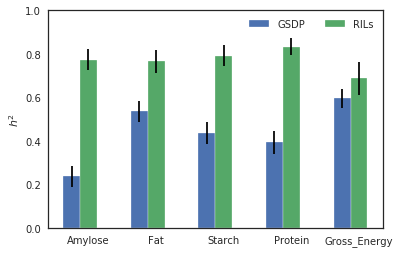

In [74]:
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = sap['h2']
bars2 = btx['h2']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1,  width=barWidth, yerr=sap['SE'], edgecolor='white', label='GSDP')
plt.bar(r2, bars2,  width=barWidth, yerr=btx['SE'], edgecolor='white', label='RILs') 
# Add xticks on the middle of the group bars
plt.xlabel('', fontweight='bold')
plt.ylabel('$h^2$', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Amylose', 'Fat', 'Starch', 'Protein', 'Gross_Energy'])
plt.ylim(ymax=1,ymin=0)
# Create legend & Show graphic
plt.legend(frameon = False, loc='upper right', ncol = 2)
#plt.show()

plt.savefig("/panicle/ssapkot/git_repo/GrainComp_GS/results/figures/GenomicHeritability.png", dpi=500)
